<a href="https://colab.research.google.com/github/smvicky/pixel_test_submissions/blob/main/house_prices__advRegTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

train_raw = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
train_raw.head(), test.head()

(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

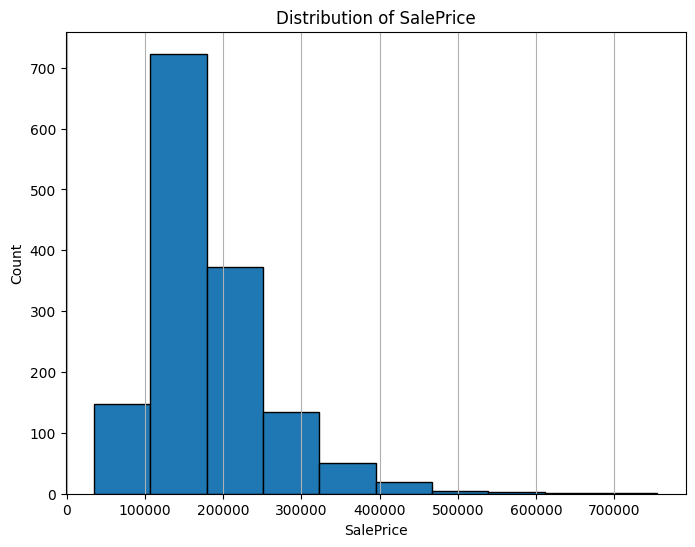

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Option 1: Simple histogram using 'hist' method
train_raw["SalePrice"].hist(bins=10, edgecolor='black')  # Adjust 'bins' for desired number of bars
plt.xlabel("SalePrice")
plt.ylabel('Count')
plt.title('Distribution of SalePrice')
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()

In [ ]:
# now looks like greater than 47000 is outlier so need to remove it from dataset
print("before shaep ",train_raw.shape)

before shaep  (1460, 81)


In [ ]:
train_raw = train_raw[train_raw['SalePrice'] <= 470000]
print("after shaep ", train_raw.shape)

after shaep  (1449, 81)


In [ ]:
# dropping these columns with most Null values
cols_to_remove = ["LotFrontage", "Alley","MasVnrType","FireplaceQu","PoolQC","Fence","MiscFeature"]
train_raw.drop(columns=cols_to_remove,axis = 1, inplace=True)
test.drop(columns=cols_to_remove,axis = 1, inplace=True)
train_raw.dropna(inplace=True)

In [ ]:
cols_to_remove = ["LotFrontage", "Alley","MasVnrType","FireplaceQu","PoolQC","Fence","MiscFeature"]
train_raw.drop(columns=cols_to_remove,axis = 1, inplace=True)
test.drop(columns=cols_to_remove,axis = 1, inplace=True)

# Option 1: set inplace to False
train_raw = train_raw.dropna(inplace=False)

# Option 2: assign the result of dropna() back to train_raw
train_raw = train_raw.dropna()

In [ ]:
#adding new feature total_bath
train_raw['total_baths'] = train_raw['BsmtFullBath'] + train_raw['BsmtHalfBath'] + train_raw['FullBath'] + train_raw['HalfBath']
test['total_baths'] = test['BsmtFullBath'] + test['BsmtHalfBath'] + test['FullBath'] + test['HalfBath']

In [ ]:
# Option 1: assign the copies back to the original DataFrames
train_raw = train_raw.copy()
test = test.copy()

train_raw['total_baths'] = train_raw['BsmtFullBath'] + train_raw['BsmtHalfBath'] + train_raw['FullBath'] + train_raw['HalfBath']
test['total_baths'] = test['BsmtFullBath'] + test['BsmtHalfBath'] + test['FullBath'] + test['HalfBath']

# Option 2: use the loc attribute to modify the original DataFrames directly
train_raw.loc[:, 'total_baths'] = train_raw['BsmtFullBath'] + train_raw['BsmtHalfBath'] + train_raw['FullBath'] + train_raw['HalfBath']
test.loc[:, 'total_baths'] = test['BsmtFullBath'] + test['BsmtHalfBath'] + test['FullBath'] + test['HalfBath']

In [ ]:
traget = ["SalePrice"]
feature = train_raw.columns.drop(['SalePrice'])
y =train_raw[traget]
X = train_raw[feature]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val = train_test_split(X,train_size=0.8,random_state=2)
y_train,y_val = train_test_split(y,train_size=0.8,random_state=2)
X_train.shape,X_val.shape,y_train.shape,y_val.shape,

((1061, 74), (266, 74), (1061, 1), (266, 1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    LinearRegression()
    )


In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'ExterQual', 'ExterCond',
                                     'Foundation', 'BsmtQual', 'BsmtCond',
                                     'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual',
                                     'Functional', ...],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('linearregression', LinearRegression())])

In [ ]:
pipeline.predict(X_val)[range(5)]

array([[340082.36787903],
       [231220.93799809],
       [154800.90995726],
       [199738.22936896],
       [215092.85889998]])

In [ ]:
validation_accuracy = pipeline.score(X_val,y_val)
validation_accuracy

0.9026767306850079

In [ ]:
y_pred = pipeline.predict(test)

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['SalePrice'])

In [ ]:
def create_submission(test, y_pred):
  """
  Create a submission DataFrame from test DataFrame and y_pred DataFrame

  Args:
      test (pd.DataFrame): DataFrame containing the 'id' column
      y_pred (pd.DataFrame): DataFrame containing the 'SalesPrice' column

  Returns:
      pd.DataFrame: A new DataFrame with 'id' and 'SalesPrice' columns
  """
  # Concatenate DataFrames by row (inner join)
  submission = pd.concat([test[['Id']], y_pred[['SalePrice']]], axis=1)
  return submission

In [ ]:
submission = create_submission(test,y_pred)
submission = submission.set_index('Id',drop=True)

submission.to_csv("submission_sales_price.csv")

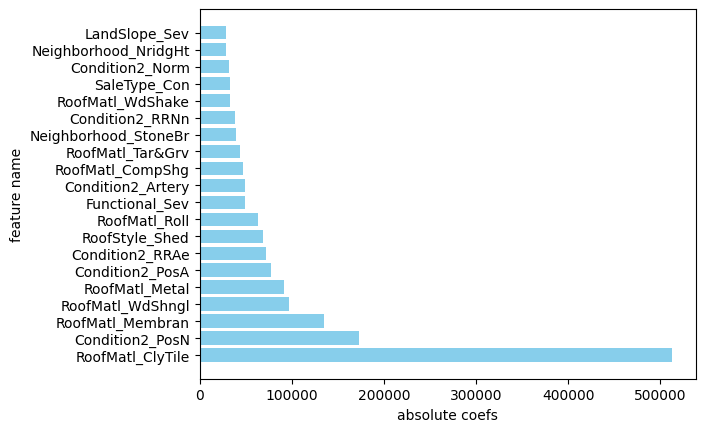

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
coefs = np.absolute(pipeline.named_steps.linearregression.coef_)
columns = pipeline.named_steps.onehotencoder.feature_names_out_

coef_series = pd.Series(coefs[0],columns)
data = coef_series.sort_values(ascending=False).head(20)
plt.xlabel("absolute coefs")
plt.ylabel("feature name")
plt.barh(data.index,data.values,color='skyblue')
plt.show()

In [ ]:
coef_series

Id                           0.853482
MSSubClass                  76.326744
MSZoning_RL               4114.346361
MSZoning_RM                744.332979
MSZoning_FV              12759.676570
                             ...     
SaleCondition_Partial    12937.335545
SaleCondition_Alloca      8201.698370
SaleCondition_Family      9488.845254
SaleCondition_AdjLand    23700.526272
total_baths                253.753890
Length: 260, dtype: float64